# Analysis
In this section, I will perform different analysis on the whole dataset.

First I will compare Fitbit Sleep Data with SleepScore Data

In [1]:
import numpy as np
import pandas as pd
import os
from datetime import datetime as dt
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import pycaret.classification as c
import pycaret.regression as r
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
sns.set_style('white')
plt.rcParams['axes.spines.right'] = False  # display axis spines
plt.rcParams['axes.spines.top'] = False
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams["axes.grid.axis"] ="y"
plt.rcParams["axes.grid"] = True

In [3]:
df = pd.read_pickle('../data/all.csv')

In [4]:
df.iloc[:,:20].head()

,Date,Mood,Mood_num,Mood_bin,Mood_bin_num,Time,Day,Entertainment,Exercise,Family,Food,Friends,Hobby,Love,Music,NightOut,Projects,School,SelfCare,Sleep
0,2022-10-01,Okay,2,Bad,0,16.200000,Saturday,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2022-10-02,Bad,1,Bad,0,20.750000,Sunday,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2022-10-03,Terrific,4,Good,1,18.350000,Monday,0,1,1,1,1,1,1,0,0,1,1,1,1
3,2022-10-04,Terrific,4,Good,1,22.733333,Tuesday,0,0,0,0,0,0,1,0,0,0,0,1,0
4,2022-10-05,Okay,2,Bad,0,22.150000,Wednesday,0,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
df.iloc[:,20:40].head()

,CaffeineCups,AlcoholDrinks,Stress,Sleepiness,PreviousNightMood,StressR7DM,SleepinessR7DM,AtHome,CaloriesBurned,Steps,Distance,Floors,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,ActivityCalories,CaloriesBurned_R7DM,Steps_R7DM,Distance_R7DM
0,0.0,0.0,0.16,0.16,NaN,NaN,NaN,1,3068.0,9944.0,7.25,19.0,464.0,379.0,4.0,6.0,1660.0,3068.0,9944.000000,7.250000
1,0.0,0.0,0.24,0.44,NaN,NaN,NaN,1,2979.0,10925.0,8.01,19.0,577.0,292.0,17.0,26.0,1504.0,3023.5,10434.500000,7.630000
2,0.0,0.0,0.52,0.56,NaN,NaN,NaN,1,3496.0,12709.0,9.26,12.0,523.0,390.0,28.0,12.0,2143.0,3181.0,11192.666667,8.173333
3,0.0,0.0,0.24,0.32,NaN,0.290,0.370,0,2769.0,9808.0,7.17,17.0,752.0,209.0,21.0,12.0,1242.0,3078.0,10846.500000,7.922500
4,0.0,1.0,0.16,0.44,NaN,0.264,0.384,0,3146.0,12934.0,9.44,16.0,729.0,246.0,28.0,37.0,1632.0,3091.6,11264.000000,8.226000


In [6]:
df.iloc[:,40:60].head()

,Floors_R7DM,SedentaryMinutes_R7DM,LightlyActiveMinutes_R7DM,FairlyActiveMinutes_R7DM,VeryActiveMinutes_R7DM,ActivityCalories_R7DM,FB_Onset,FB_Offset,FB_TST,FB_WASO,FB_NOA,FB_TIB,FB_REMSD,FB_LSD,FB_DSD,FB_TSDP,FB_AI,FB_SWSP,FB_REMP,FB_SMI
0,19.000000,464.000000,379.000000,4.000000,6.000000,1660.00,23.183333,7.533333,447.0,54.0,33.0,501.0,80.0,277.0,90.0,501.0,4.429530,20.134228,17.897092,89.221557
1,19.000000,520.500000,335.500000,10.500000,16.000000,1582.00,22.550000,7.350000,437.0,91.0,32.0,528.0,84.0,297.0,56.0,528.0,4.393593,12.814645,19.221968,82.765152
2,16.666667,521.333333,353.666667,16.333333,14.666667,1769.00,22.750000,6.866667,426.0,61.0,28.0,487.0,104.0,264.0,58.0,487.0,3.943662,13.615023,24.413146,87.474333
3,16.750000,579.000000,317.500000,17.500000,14.000000,1637.25,23.150000,6.583333,382.0,64.0,28.0,446.0,53.0,247.0,82.0,446.0,4.397906,21.465969,13.874346,85.650224
4,16.600000,609.000000,303.200000,19.600000,18.600000,1636.20,24.583333,7.250000,352.0,48.0,20.0,400.0,74.0,208.0,70.0,400.0,3.409091,19.886364,21.022727,88.000000


In [7]:
df.iloc[:,60:80].head()

,FB_MWD,FB_Midpoint,IsWeekend,FB_SR,SS_Bedtime,SS_SOL,SS_TST,SS_WASO,SS_Waketime,SS_TIB,SS_NOA,SS_LSD,SS_DSD,SS_REMSD,SS_ARR,SS_SS,SS_MS,SS_BS,SS_SE,SS_SMI
0,1.636364,4.175000,1,NaN,23.062778,21.0,455.0,32.0,7.529444,508.0,6.0,214.0,152.0,89.0,13.86,92.0,87.0,92.0,89.57,93.429158
1,2.843750,4.400000,1,NaN,22.387222,19.0,461.0,50.0,7.312222,535.0,9.0,252.0,112.0,96.0,13.82,92.0,94.0,83.0,86.17,89.254598
2,2.178571,4.058333,0,0.173672,22.571667,18.0,447.0,31.0,6.980000,504.0,6.0,246.0,95.0,106.0,14.11,91.0,91.0,79.0,88.69,91.880781
3,2.285714,3.716667,0,0.285003,22.734722,51.0,411.0,22.0,6.884722,489.0,3.0,253.0,126.0,31.0,14.15,79.0,53.0,87.0,84.05,93.835616
4,2.400000,3.916667,0,0.258374,24.507500,8.0,378.0,18.0,7.265833,404.0,6.0,185.0,118.0,74.0,14.85,85.0,83.0,85.0,93.56,95.094340


In [8]:
df.iloc[:,80:].head()

,SS_AI,SS_REMP,SS_SWSP,SS_Onset,SS_Offset,SS_TSDP,SS_MWD,SS_Midpoint,SS_SR
0,0.79,19.56,33.41,23.412778,7.529444,487.0,5.333333,4.058333,NaN
1,1.17,20.82,24.30,22.703889,7.312222,516.5,5.555556,4.304167,NaN
2,0.81,23.71,21.25,22.871667,6.980000,486.5,5.166667,4.054167,0.143150
3,0.44,7.54,30.66,23.584722,6.884722,438.0,7.333333,3.650000,0.270951
4,0.95,19.58,31.22,24.640833,7.265833,397.5,3.000000,3.953333,0.236354


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 89 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       56 non-null     datetime64[ns]
 1   Mood                       56 non-null     category      
 2   Mood_num                   56 non-null     int8          
 3   Mood_bin                   56 non-null     category      
 4   Mood_bin_num               56 non-null     int8          
 5   Time                       56 non-null     float64       
 6   Day                        56 non-null     object        
 7   Entertainment              56 non-null     uint8         
 8   Exercise                   56 non-null     uint8         
 9   Family                     56 non-null     uint8         
 10  Food                       56 non-null     uint8         
 11  Friends                    56 non-null     uint8         
 12  Hobby     

In [10]:
df['Week'] = (df.Date.dt.isocalendar().week - 36).astype('int')

In [11]:
for col in ['SS_SOL', 'SS_Onset', 'SS_TST', 'SS_WASO', 'SS_NOA', 'SS_SR', 'Mood_num', 'Mood_bin_num']:
    df[col + '_R7DM'] = df[col].rolling(7,1).mean()

## Analysing each Factor

SS_Onset: 23.91478835952381
SS_Offset: 7.527288359809523
SS_TST: 418.0952380952381
SS_SR: 0.40184531497002113


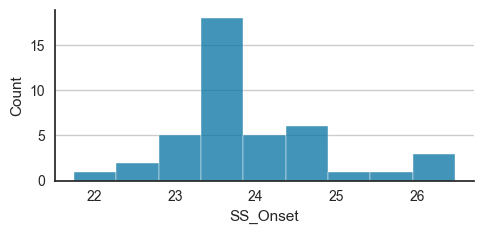

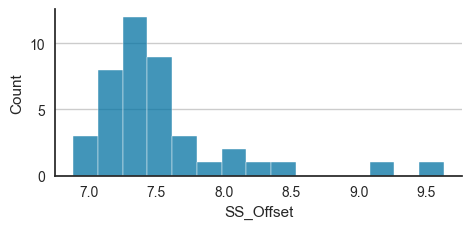

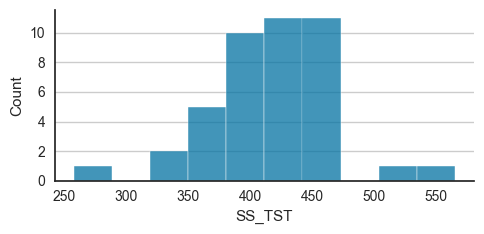

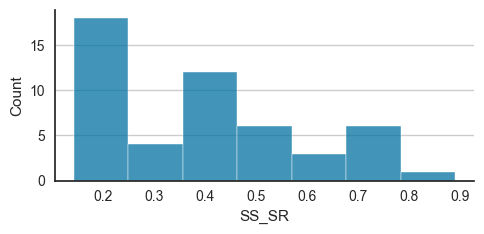

In [12]:
for x in ['SS_Onset', 'SS_Offset', 'SS_TST', 'SS_SR']:
    print(f'{x}: {df[x].mean()}')
    sns.displot(data=df, x=x, aspect=2, height=2.5)
    plt.savefig(f'../visuals/analysis/a_{x}.png', bbox_inches='tight')

Steps: 13740.86, 24424.0
VeryActiveMinutes: 47.04, 129.0
SedentaryMinutes: 700.3, 1260.0
ActivityCalories: 1769.42, 2939.0


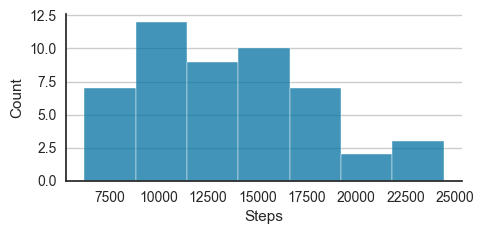

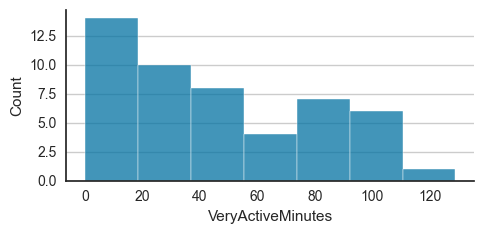

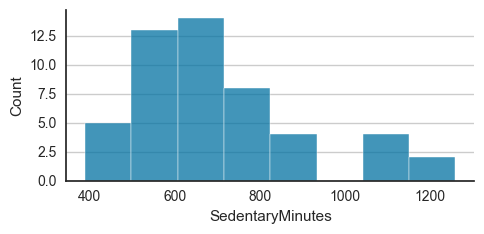

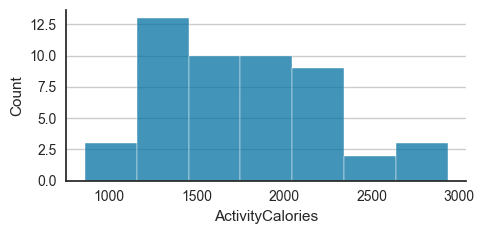

In [13]:
for x in ['Steps', 'VeryActiveMinutes', 'SedentaryMinutes', 'ActivityCalories']:
    print(f'{x}: {df[x].mean()}, {df[x].max()}')
    sns.displot(data=df, x=x, aspect=2, height=2.5)
    plt.savefig(f'../visuals/analysis/a_{x}.png', bbox_inches='tight')

CaffeineCups: 0.13333333333333333
AlcoholDrinks: 0.2
StressR7DM: 0.2954016563146998
SleepinessR7DM: 0.4857453416149069


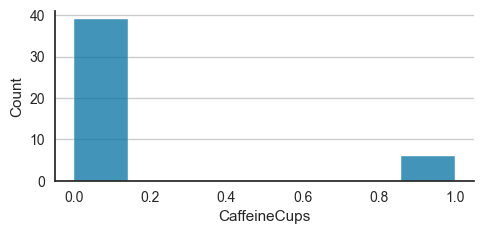

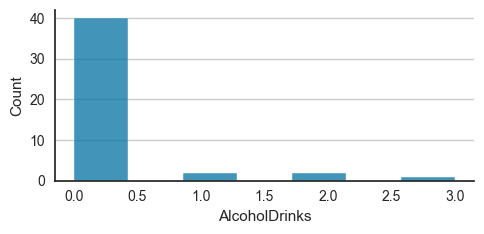

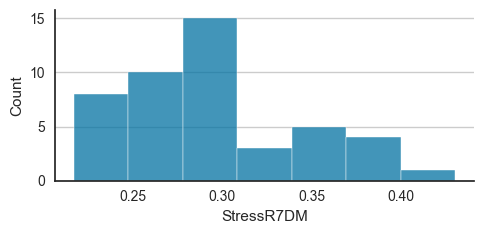

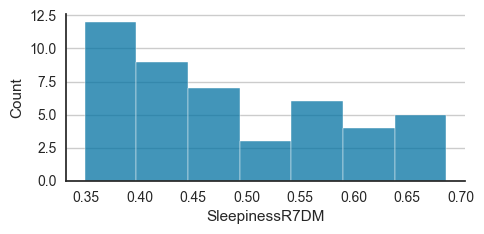

In [14]:
for x in ['CaffeineCups', 'AlcoholDrinks', 'StressR7DM', 'SleepinessR7DM']:
    print(f'{x}: {df[x].mean()}')
    sns.displot(data=df, x=x, height=2.5, aspect=2)
    plt.savefig(f'../visuals/analysis/a_{x}.png', bbox_inches='tight')

CaffeineCups: 0.13333333333333333
AlcoholDrinks: 0.2
StressR7DM: 0.2954016563146998
SleepinessR7DM: 0.4857453416149069


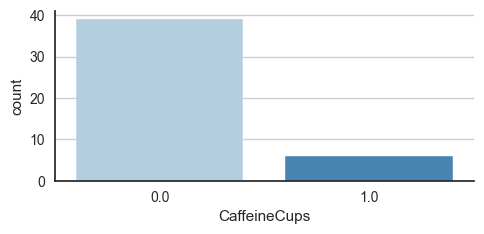

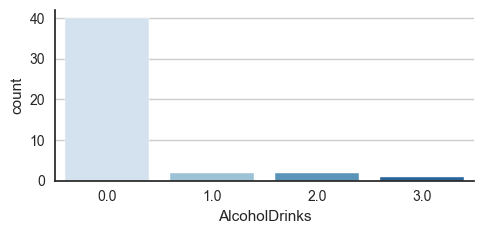

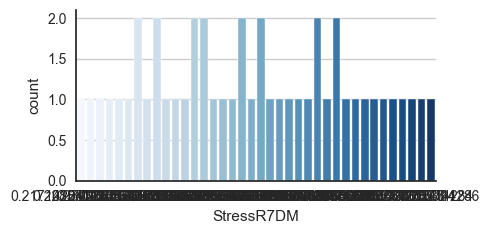

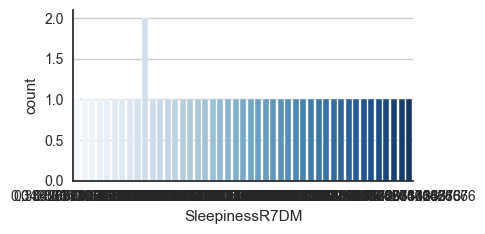

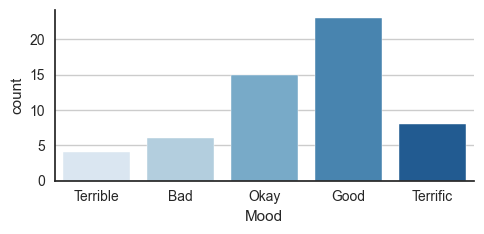

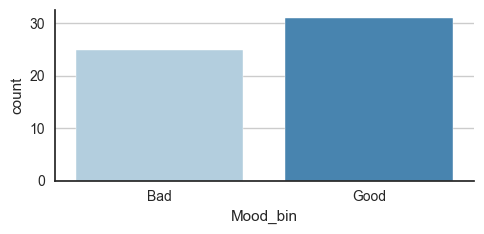

In [15]:
for x in ['CaffeineCups', 'AlcoholDrinks', 'StressR7DM', 'SleepinessR7DM', 'Mood', 'Mood_bin']:
    try:
        print(f'{x}: {df[x].mean()}')
    except:
        pass
    sns.catplot(data=df, x=x, kind='count', height=2.5, aspect=2, palette='Blues')
    plt.savefig(f'../visuals/analysis/a_{x}.png', bbox_inches='tight')

### Social Jetlag

IsWeekend
0    414.066667
1    428.166667
Name: SS_TST, dtype: float64
IsWeekend
0    23.775639
1    24.262662
Name: SS_Onset, dtype: float64
IsWeekend
0    3.985713
1    4.491620
Name: SS_Midpoint, dtype: float64
IsWeekend
0    7.373139
1    7.912662
Name: SS_Offset, dtype: float64


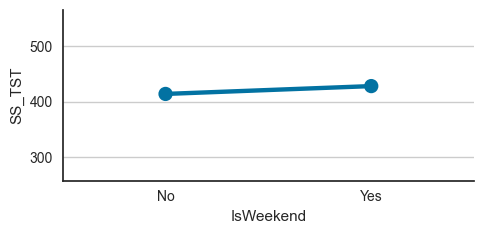

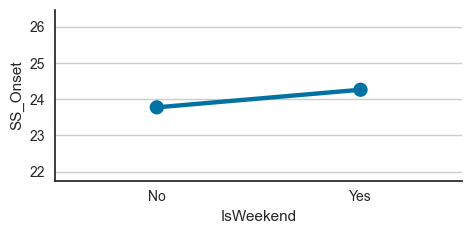

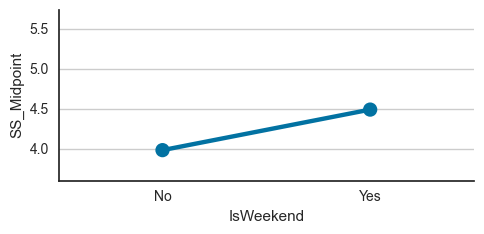

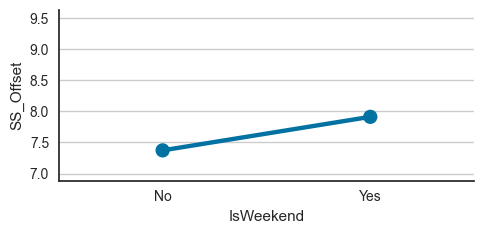

In [16]:
for y in ['SS_TST', 'SS_Onset', 'SS_Midpoint', 'SS_Offset']:
    x = 'IsWeekend'
    print(df.groupby(x)[y].mean())
    sns.catplot(df, x=x, y=y, kind='point', height=2.5, aspect=2, errorbar=None)
    plt.ylim(df[y].min(), df[y].max())
    plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
    plt.savefig(f'../visuals/analysis/{x}_{y}.png', bbox_inches='tight')

(258.0, 565.0)

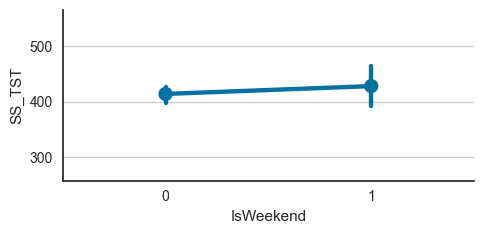

In [17]:
x = 'IsWeekend'
y = 'SS_TST'
sns.catplot(df, x=x, y=y, kind='point', height=2.5, aspect=2)
plt.ylim(df[y].min(), df[y].max())

## Analysising Data over the Semester
I want to look at some of the key metrics over the semester

- Steps
- Sedantary Minutes
- Highly Active Minutes
- Sleep Onset Latency
- Onset
- Total Sleep Time
- Wakefulness After Sleep Onset
- Number of Awakenings
- Sleep Regularity
- Mood (numeric)

### Fitbit Acitivty

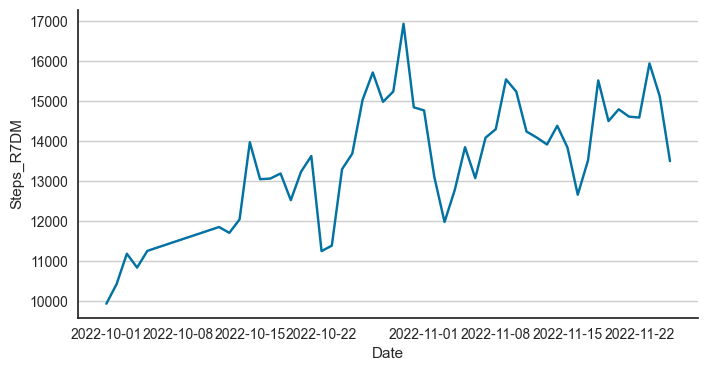

In [18]:
sns.lineplot(data=df, x='Date', y='Steps_R7DM');

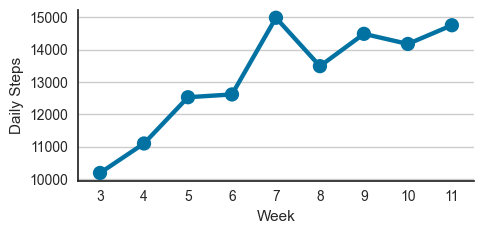

In [19]:
x = 'Week'
y = 'Steps_R7DM'
sns.catplot(data=df, x=x, y=y, kind='point', errorbar=None, height=2.5, aspect=2)
plt.ylabel('Daily Steps')
plt.savefig(f'../visuals/analysis/{x}_{y}.png', bbox_inches='tight')

<AxesSubplot: xlabel='Date', ylabel='SedentaryMinutes_R7DM'>

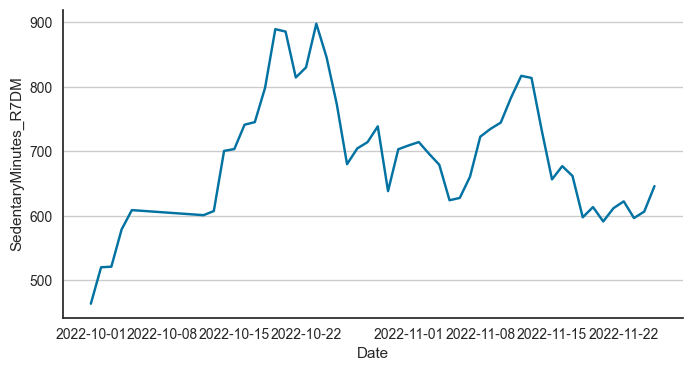

In [20]:
sns.lineplot(data=df, x='Date', y='SedentaryMinutes_R7DM')

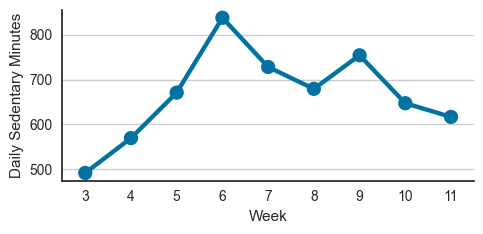

In [21]:
x = 'Week'
y = 'SedentaryMinutes_R7DM'
sns.catplot(data=df, x=x, y=y, kind='point', errorbar=None, height=2.5, aspect=2)
plt.ylabel('Daily Sedentary Minutes')
plt.savefig(f'../visuals/analysis/{x}_{y}.png', bbox_inches='tight')

<AxesSubplot: xlabel='Date', ylabel='VeryActiveMinutes_R7DM'>

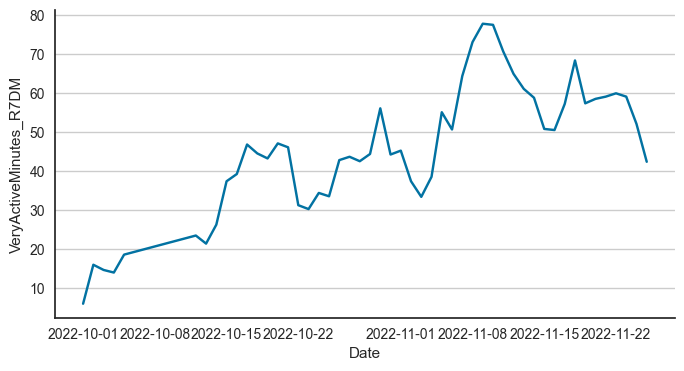

In [22]:
sns.lineplot(data=df, x='Date', y='VeryActiveMinutes_R7DM')

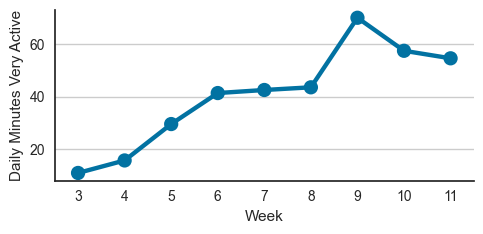

In [23]:
x = 'Week'
y = 'VeryActiveMinutes_R7DM'
sns.catplot(data=df, x=x, y=y, kind='point', errorbar=None, height=2.5, aspect=2)
plt.ylabel('Daily Minutes Very Active')
plt.savefig(f'../visuals/analysis/{x}_{y}.png')

### SleepScore Data

<AxesSubplot: xlabel='Date', ylabel='SS_SOL_R7DM'>

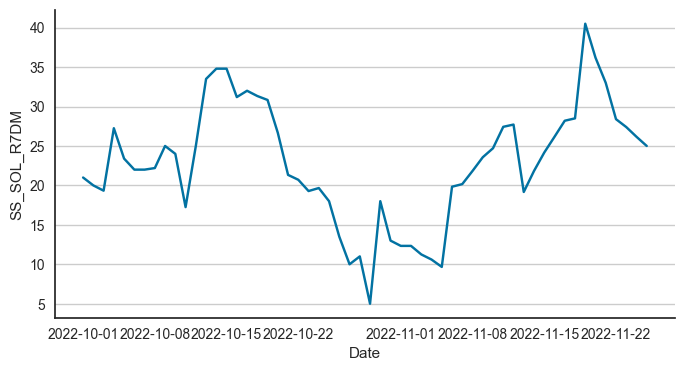

In [24]:
sns.lineplot(data=df, x='Date', y='SS_SOL_R7DM')

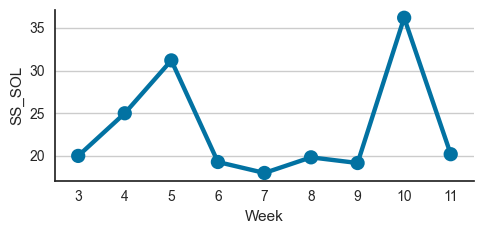

In [25]:
sns.catplot(data=df, x='Week', y='SS_SOL', kind='point', height=2.5, aspect=2, errorbar=None)

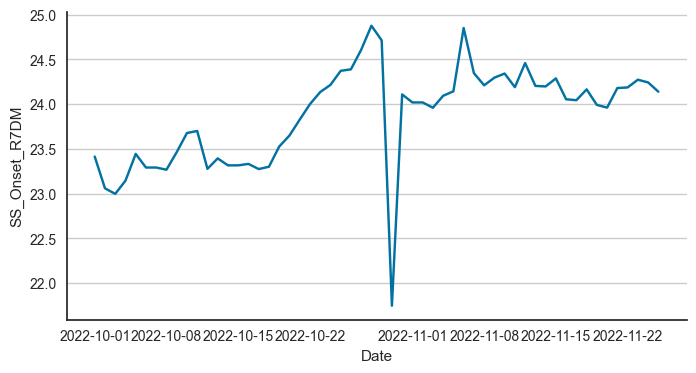

In [26]:
sns.lineplot(data=df, x='Date', y='SS_Onset_R7DM');

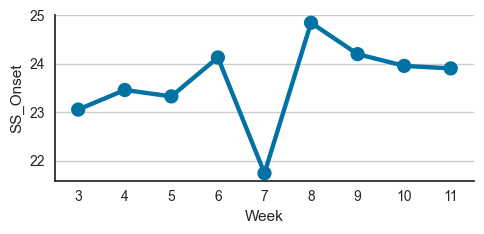

In [27]:
sns.catplot(data=df, x='Week', y='SS_Onset', kind='point', height=2.5, aspect=2, errorbar=None)

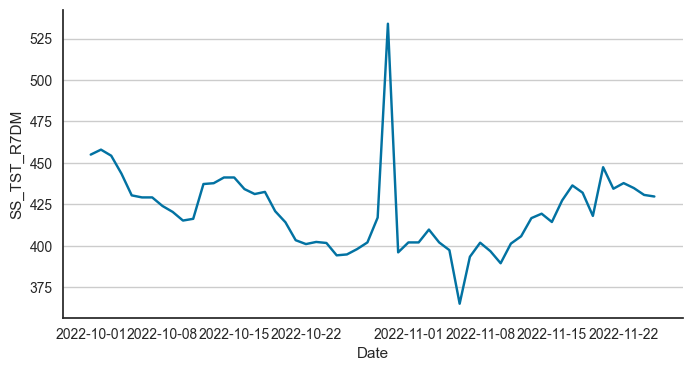

In [28]:
sns.lineplot(data=df, x='Date', y='SS_TST_R7DM');

Week
3     456.500000
4     432.995238
5     431.864286
6     415.045578
7     420.230952
8     396.297619
9     400.710884
10    427.828571
11    433.476190
Name: SS_TST_R7DM, dtype: float64


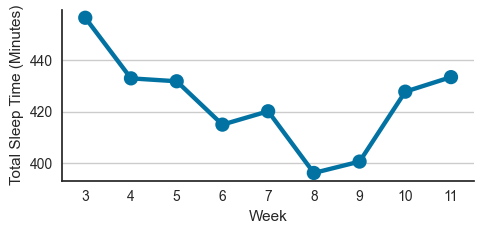

In [29]:
x = 'Week'
y = 'SS_TST_R7DM'
print(df.groupby(x)[y].mean())
sns.catplot(data=df, x=x, y=y, kind='point', errorbar=None, height=2.5, aspect=2)
plt.ylabel('Total Sleep Time (Minutes)')
plt.savefig(f'../visuals/analysis/{x}_{y}.png', bbox_inches='tight')

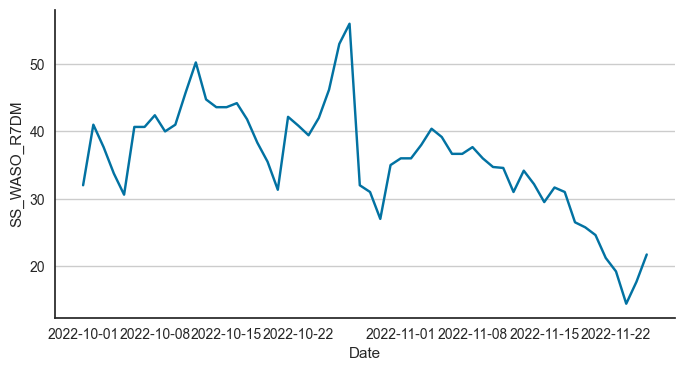

In [30]:
sns.lineplot(data=df, x='Date', y='SS_WASO_R7DM');

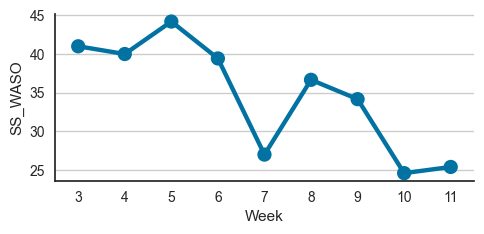

In [31]:
sns.catplot(data=df, x='Week', y='SS_WASO', kind='point', height=2.5, aspect=2, errorbar=None);

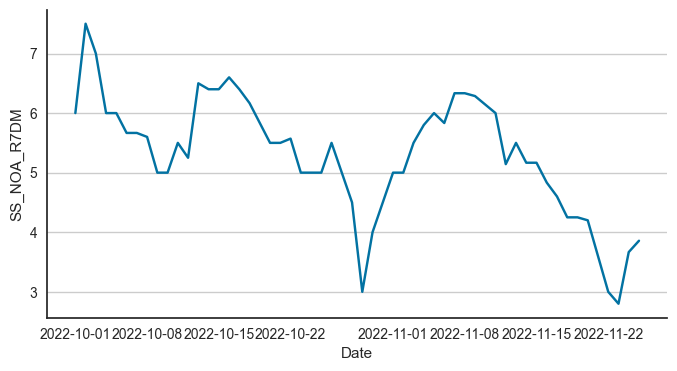

In [32]:
sns.lineplot(data=df, x='Date', y='SS_NOA_R7DM');

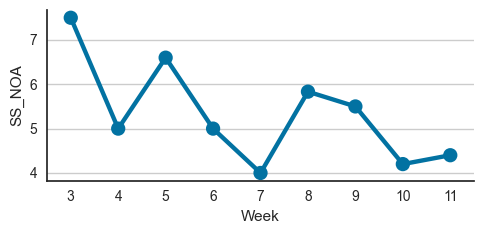

In [33]:
sns.catplot(data=df, x='Week', y='SS_NOA', kind='point', height=2.5, aspect=2, errorbar=None);

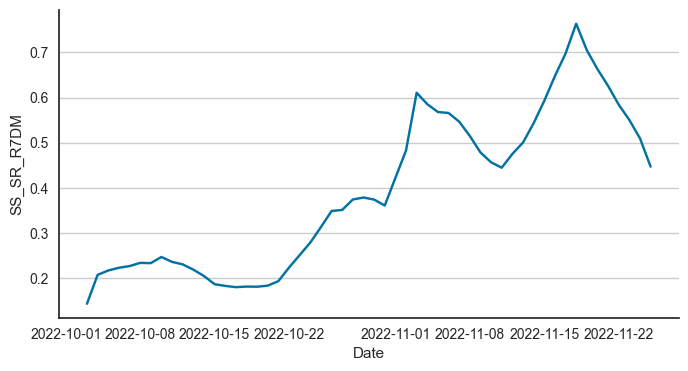

In [34]:
sns.lineplot(data=df, x='Date', y='SS_SR_R7DM');

Week
3          NaN
4     0.211880
5     0.215059
6     0.198922
7     0.345464
8     0.513650
9     0.488110
10    0.659060
11    0.543509
Name: SS_SR_R7DM, dtype: float64


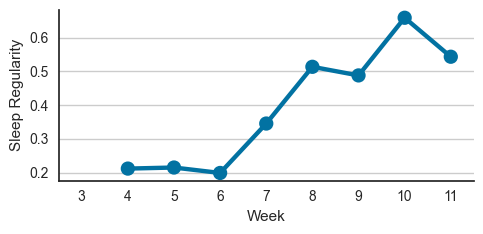

In [35]:
x = 'Week'
y = 'SS_SR_R7DM'
print(df.groupby(x)[y].mean())
sns.catplot(data=df, x=x, y=y, kind='point', errorbar=None, height=2.5, aspect=2)
plt.ylabel('Sleep Regularity')
plt.savefig(f'../visuals/analysis/{x}_{y}.png')

### Mood and Daily Log

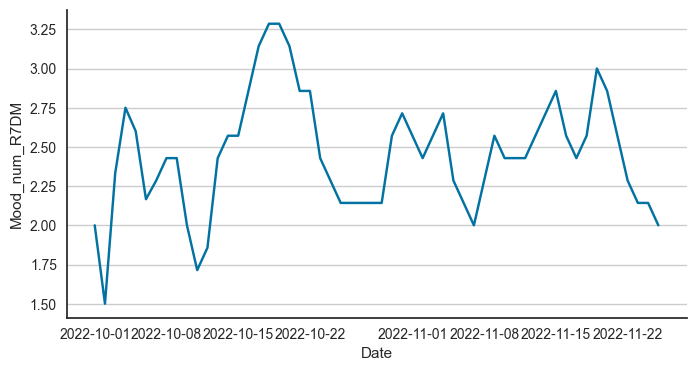

In [36]:
sns.lineplot(data=df, x='Date', y='Mood_num_R7DM');

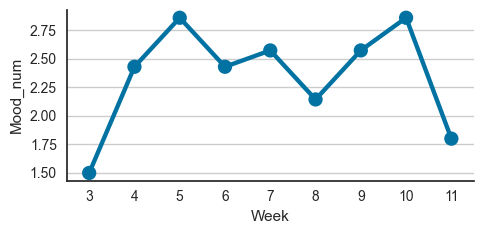

In [37]:
sns.catplot(data=df, x='Week', y='Mood_num', kind='point', height=2.5, aspect=2, errorbar=None);

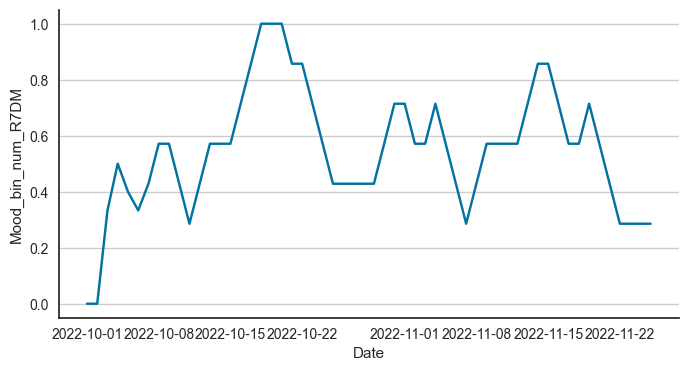

In [38]:
sns.lineplot(data=df, x='Date', y='Mood_bin_num_R7DM');

Week
3     1.750000
4     2.427551
5     2.285714
6     3.000000
7     2.224490
8     2.489796
9     2.387755
10    2.714286
11    2.228571
Name: Mood_num_R7DM, dtype: float64


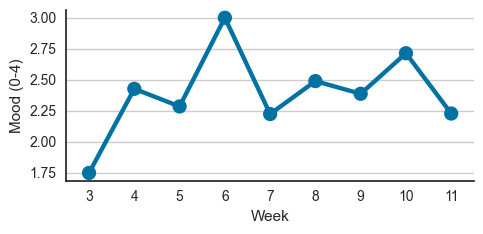

In [39]:
x = 'Week'
y = 'Mood_num_R7DM'
print(df.groupby(x)[y].mean())
sns.catplot(data=df, x=x, y=y, kind='point', errorbar=None, height=2.5, aspect=2)
plt.ylabel('Mood (0-4)')
plt.savefig(f'../visuals/analysis/{x}_{y}.png')

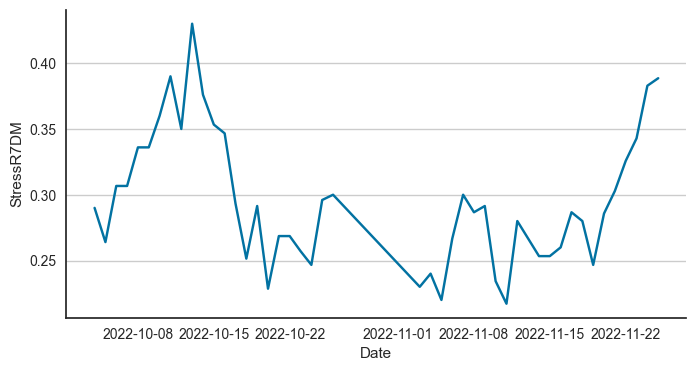

In [40]:
sns.lineplot(data=df, x='Date', y='StressR7DM');

Week
3          NaN
4     0.306556
5     0.372286
6     0.265578
7     0.280889
8     0.239167
9     0.268027
10    0.266531
11    0.348571
Name: StressR7DM, dtype: float64


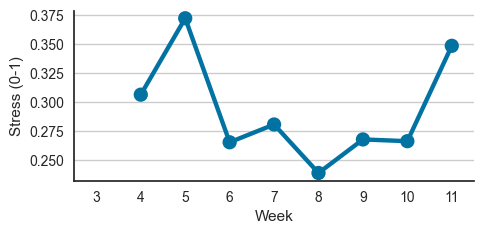

In [41]:
x = 'Week'
y = 'StressR7DM'
print(df.groupby(x)[y].mean())
sns.catplot(data=df, x=x, y=y, kind='point', errorbar=None, height=2.5, aspect=2)
plt.ylabel('Stress (0-1)')
plt.savefig(f'../visuals/analysis/{x}_{y}.png')

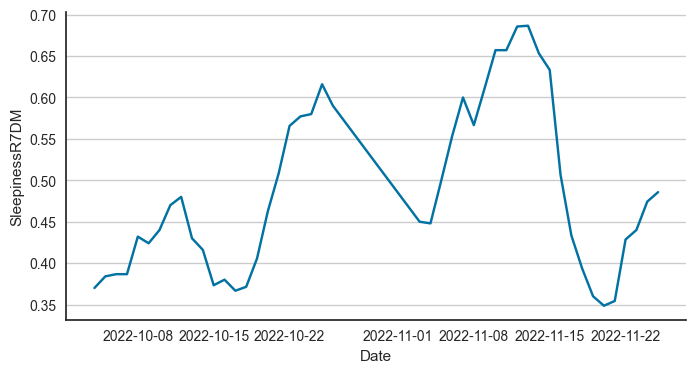

In [42]:
sns.lineplot(data=df, x='Date', y='SleepinessR7DM');

Week
3          NaN
4     0.397222
5     0.427048
6     0.465442
7     0.595333
8     0.487833
9     0.637823
10    0.475510
11    0.436571
Name: SleepinessR7DM, dtype: float64


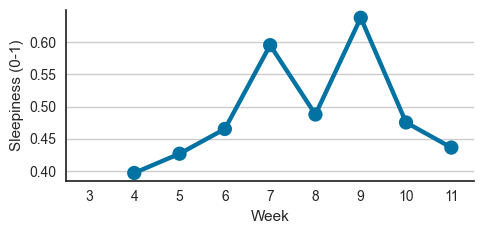

In [43]:
x = 'Week'
y = 'SleepinessR7DM'
print(df.groupby(x)[y].mean())
sns.catplot(data=df, x=x, y=y, kind='point', errorbar=None, height=2.5, aspect=2)
plt.ylabel('Sleepiness (0-1)')
plt.savefig(f'../visuals/analysis/{x}_{y}.png', bbox_inches='tight');

## Comparing Good and Bad Days

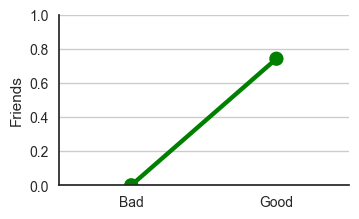

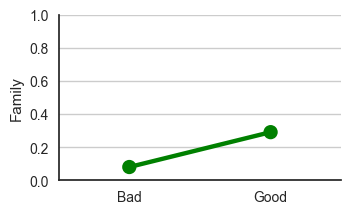

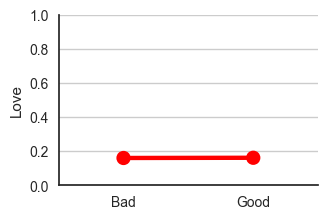

In [44]:
for y, c in [('Friends', 'green'), ('Family', 'green'), ('Love', 'red')]:
    sns.catplot(data=df, x='Mood_bin', y=y, kind='point', errorbar=None, height=2.5, aspect=1.5, color=c)
    plt.ylim(0, 1)
    plt.xlabel('')
    plt.savefig(f'./../visuals/good_bad/Mood_bin_{y}.png', bbox_inches='tight');

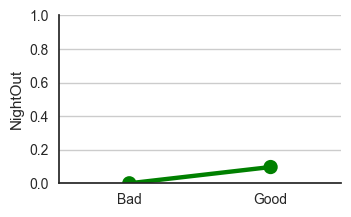

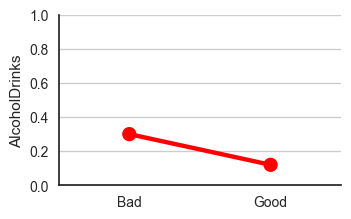

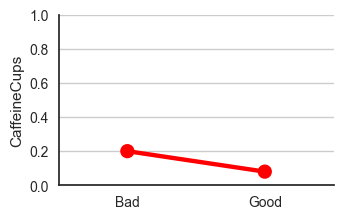

In [45]:
for y, c in [('NightOut', 'green'), ('AlcoholDrinks', 'red'), ('CaffeineCups', 'red')]:
    sns.catplot(data=df, x='Mood_bin', y=y, kind='point', errorbar=None, height=2.5, aspect=1.5, color=c)
    plt.ylim(0, 1)
    plt.xlabel('')
    plt.savefig(f'./../visuals/good_bad/Mood_bin_{y}.png', bbox_inches='tight');

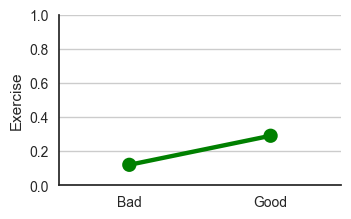

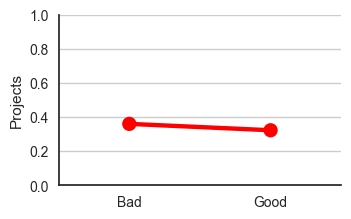

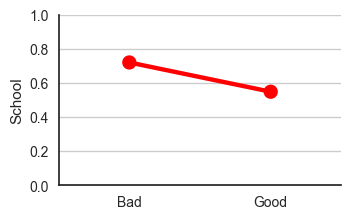

In [46]:
for y, c in [('Exercise', 'green'), ('Projects', 'red'), ('School', 'red')]:
    sns.catplot(data=df, x='Mood_bin', y=y, kind='point', errorbar=None, height=2.5, aspect=1.5, color=c)
    plt.ylim(0, 1)
    plt.xlabel('')
    plt.savefig(f'./../visuals/good_bad/Mood_bin_{y}.png', bbox_inches='tight');

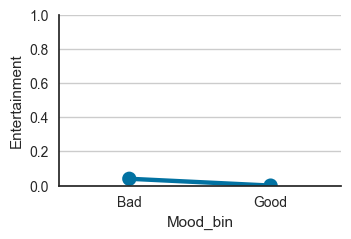

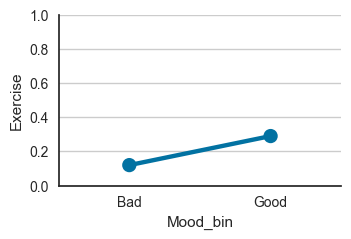

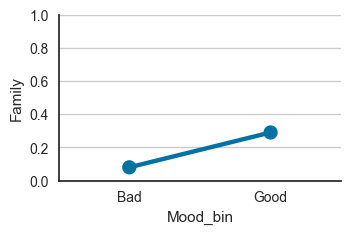

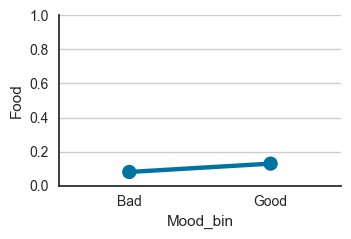

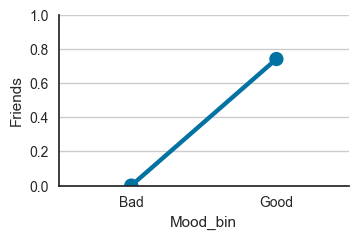

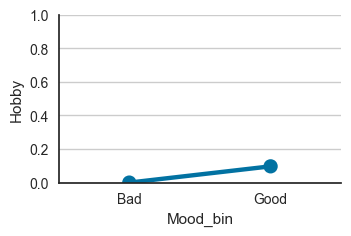

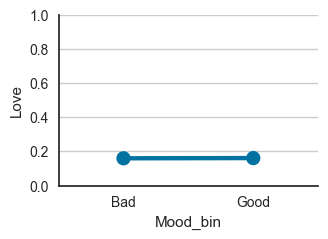

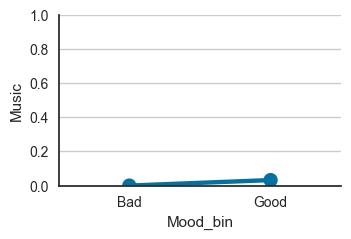

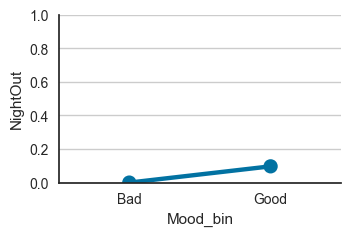

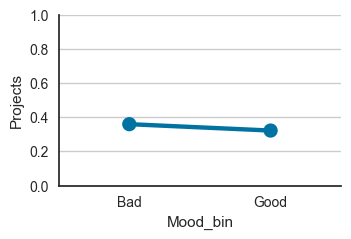

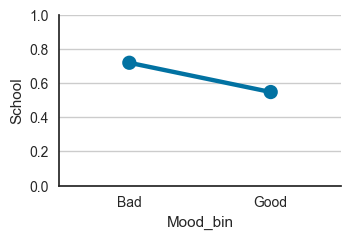

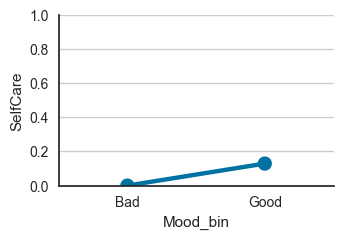

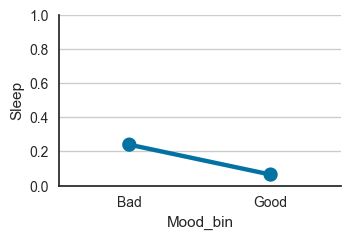

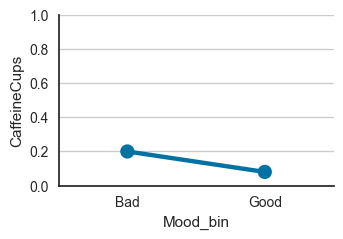

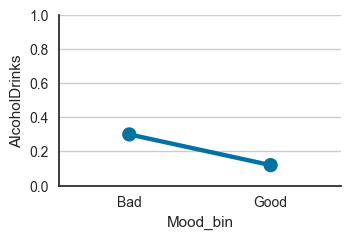

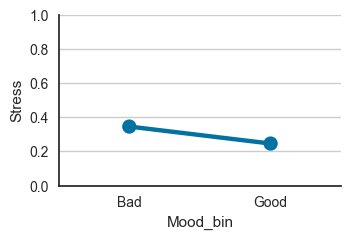

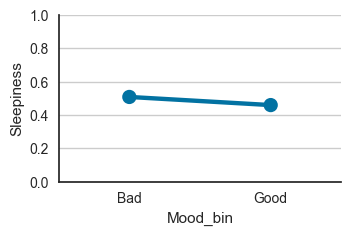

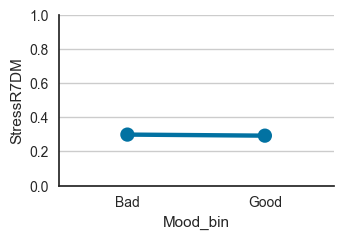

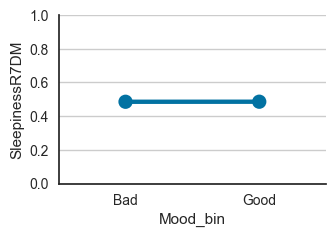

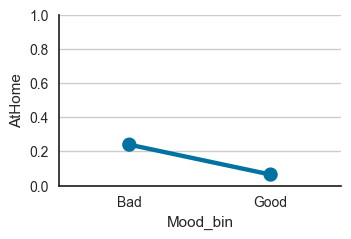

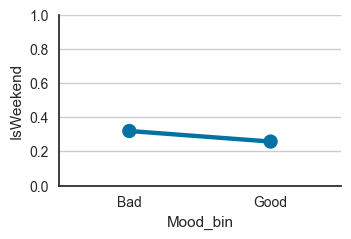

In [47]:
for col in ['Entertainment', 'Exercise', 'Family', 'Food', 'Friends', 'Hobby',
       'Love', 'Music', 'NightOut', 'Projects', 'School', 'SelfCare', 'Sleep',
       'CaffeineCups', 'AlcoholDrinks', 'Stress', 'Sleepiness', 'StressR7DM', 'SleepinessR7DM', 'AtHome',
       'IsWeekend']:
    sns.catplot(data=df, x='Mood_bin', y=col, kind='point', errorbar=None, height=2.5, aspect=1.5)
    plt.ylim(0, 1)
    plt.savefig(f'./../visuals/good_bad/Mood_bin_{col}.png');

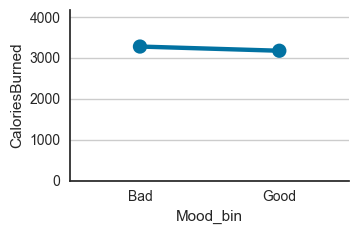

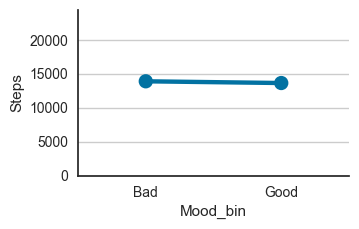

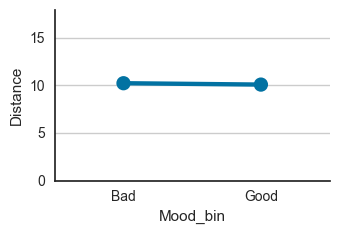

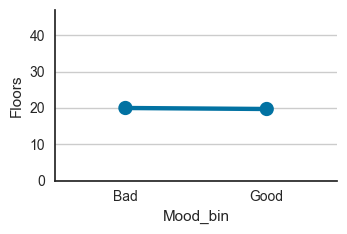

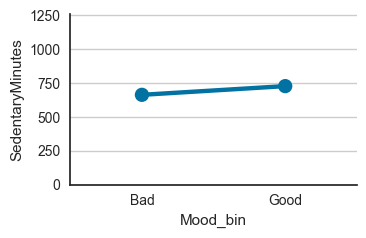

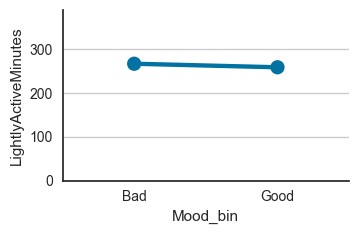

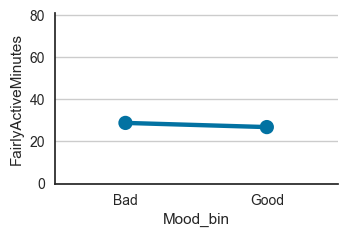

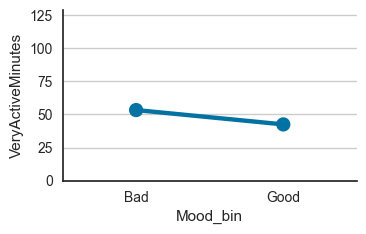

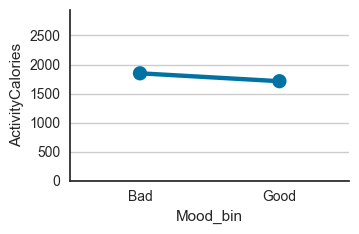

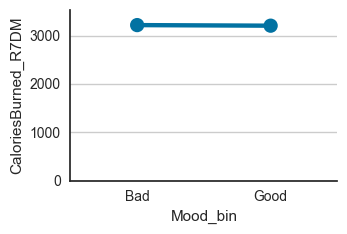

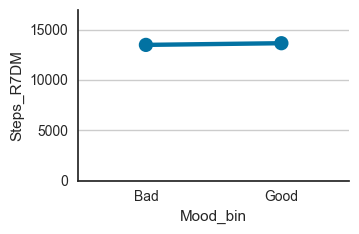

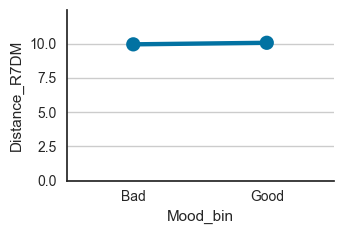

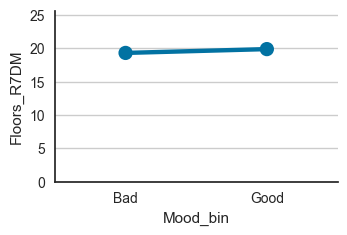

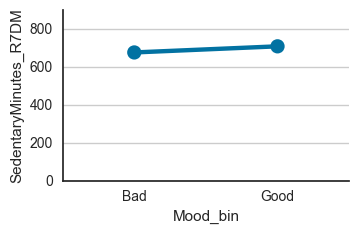

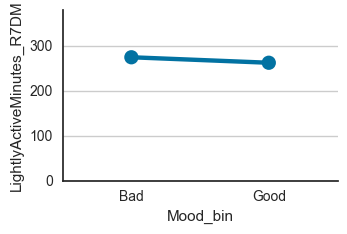

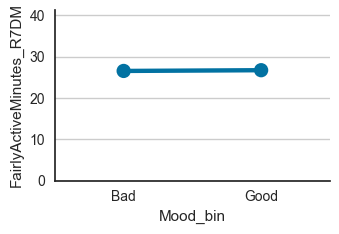

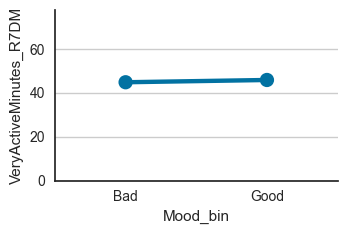

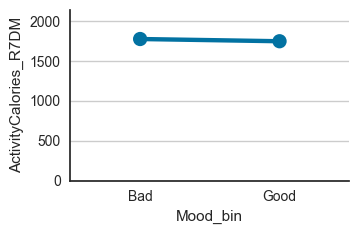

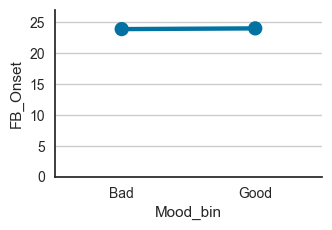

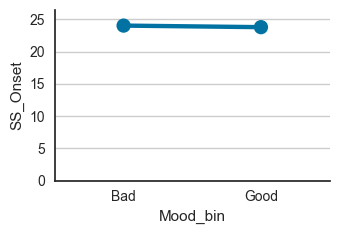

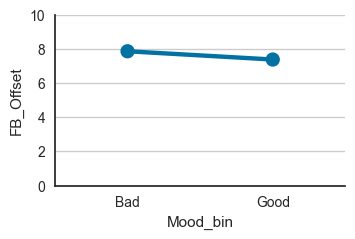

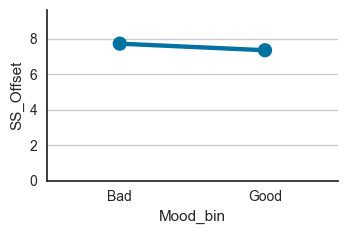

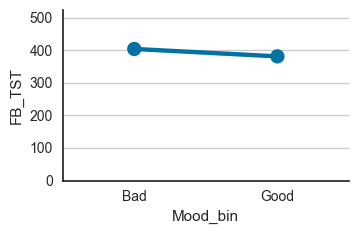

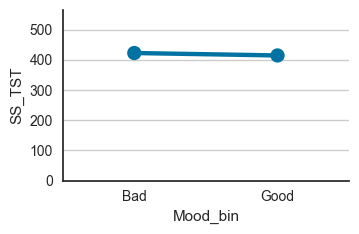

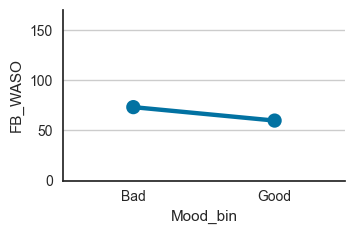

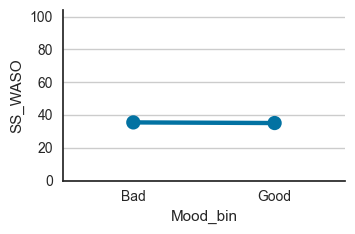

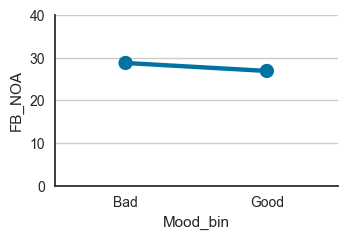

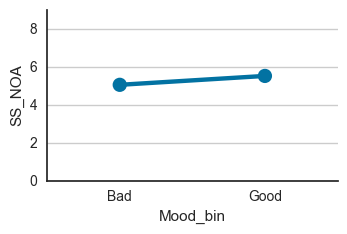

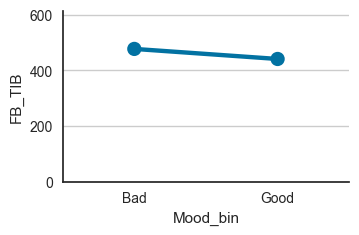

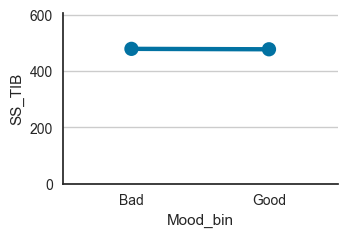

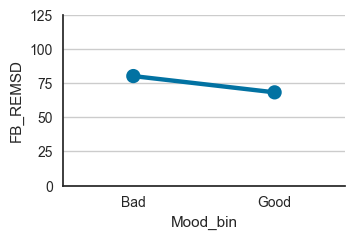

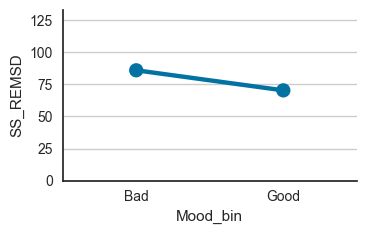

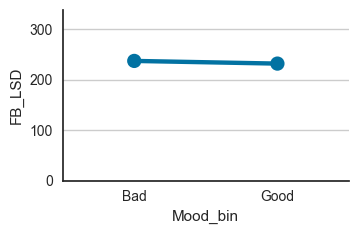

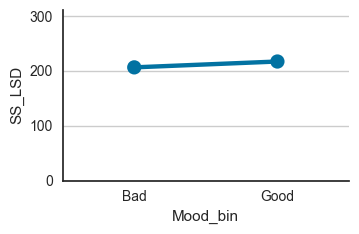

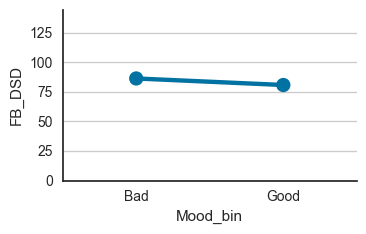

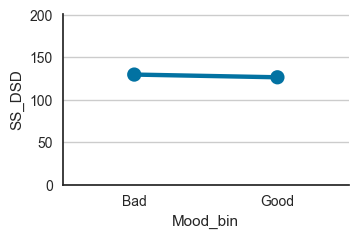

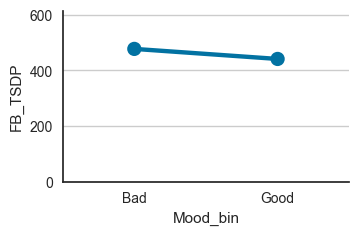

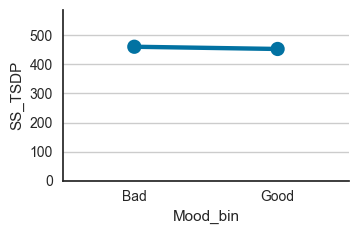

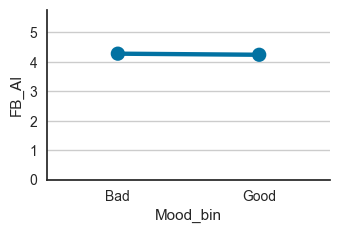

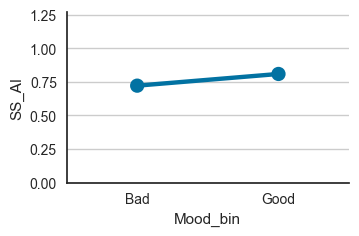

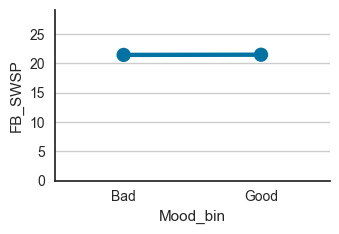

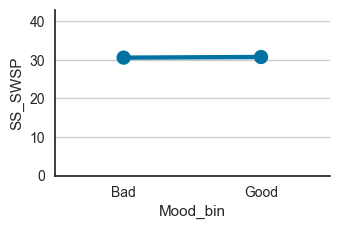

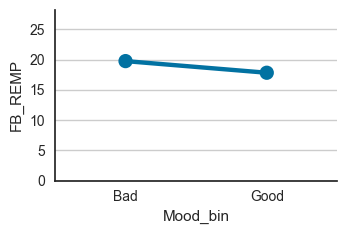

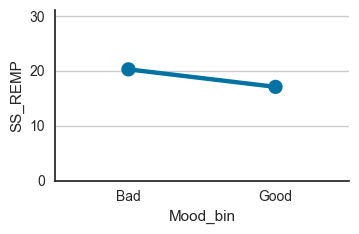

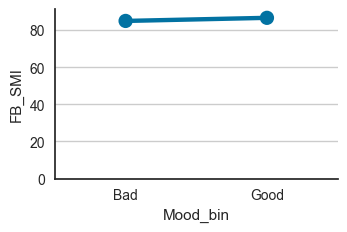

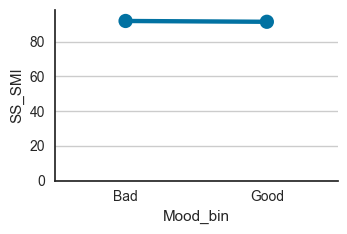

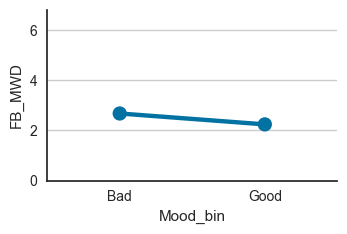

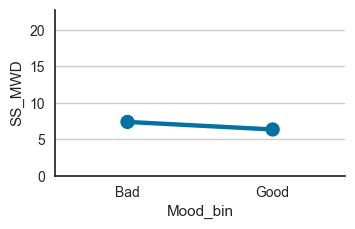

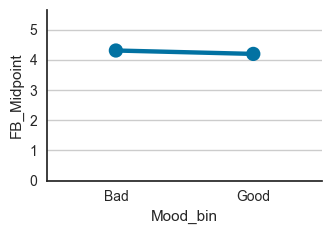

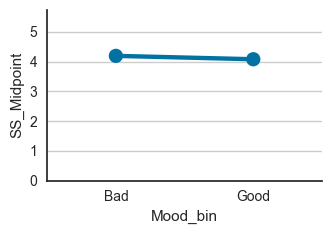

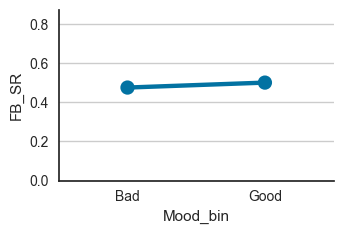

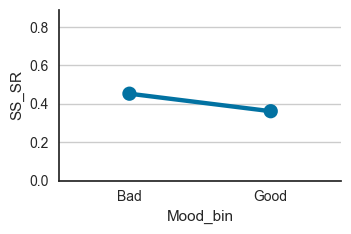

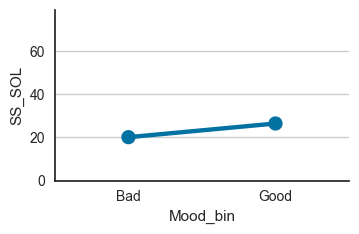

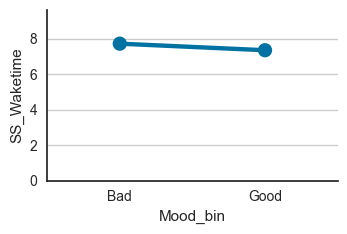

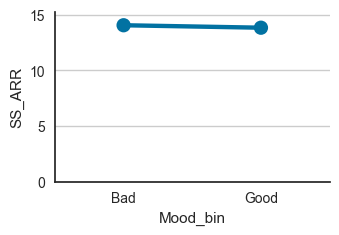

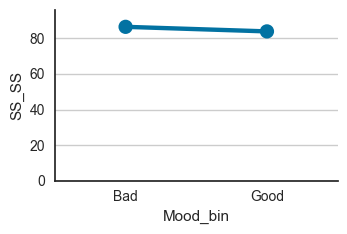

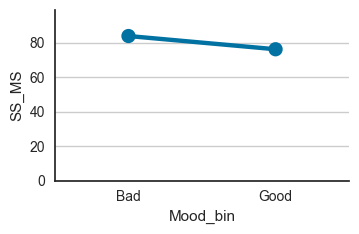

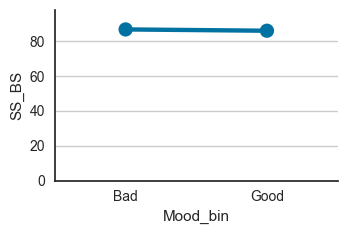

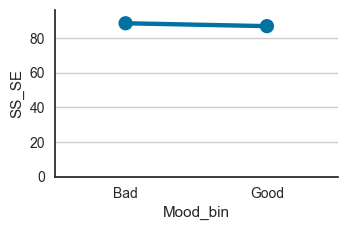

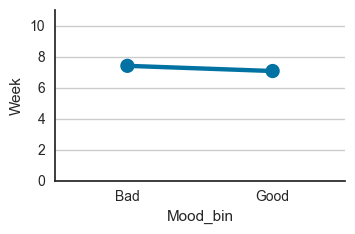

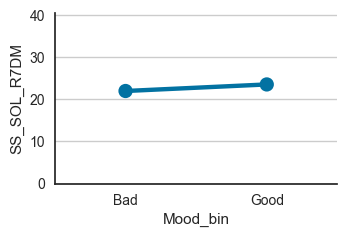

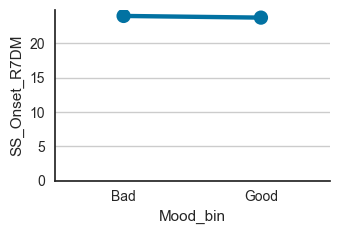

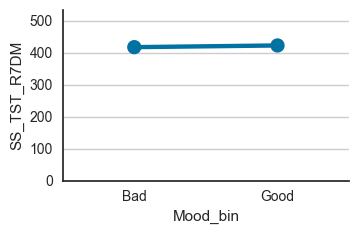

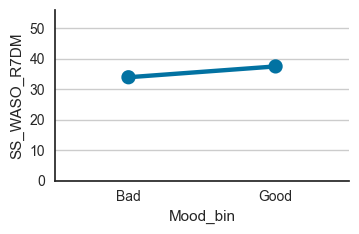

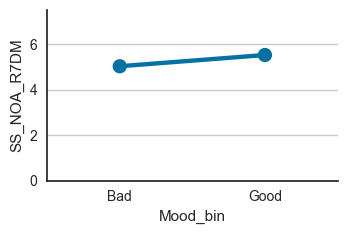

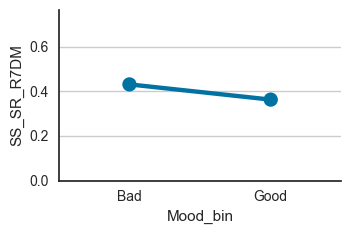

In [48]:
x = 'Mood_bin'
for col in ['CaloriesBurned', 'Steps', 'Distance',
       'Floors', 'SedentaryMinutes', 'LightlyActiveMinutes',
       'FairlyActiveMinutes', 'VeryActiveMinutes', 'ActivityCalories',
       'CaloriesBurned_R7DM', 'Steps_R7DM', 'Distance_R7DM', 'Floors_R7DM',
       'SedentaryMinutes_R7DM', 'LightlyActiveMinutes_R7DM',
       'FairlyActiveMinutes_R7DM', 'VeryActiveMinutes_R7DM',
       'ActivityCalories_R7DM', 'FB_Onset', 'SS_Onset', 'FB_Offset', 'SS_Offset', 'FB_TST', 'SS_TST', 
            'FB_WASO', 'SS_WASO', 'FB_NOA', 'SS_NOA', 'FB_TIB', 'SS_TIB', 'FB_REMSD', 'SS_REMSD', 
            'FB_LSD', 'SS_LSD', 'FB_DSD', 'SS_DSD', 'FB_TSDP', 'SS_TSDP', 'FB_AI', 'SS_AI',
            'FB_SWSP', 'SS_SWSP', 'FB_REMP', 'SS_REMP', 'FB_SMI', 'SS_SMI', 'FB_MWD', 'SS_MWD', 
            'FB_Midpoint', 'SS_Midpoint', 'FB_SR', 'SS_SR', 
            'SS_SOL', 'SS_Waketime', 'SS_ARR', 'SS_SS', 'SS_MS', 'SS_BS', 'SS_SE', 'Week', 'SS_SOL_R7DM',
       'SS_Onset_R7DM', 'SS_TST_R7DM', 'SS_WASO_R7DM', 'SS_NOA_R7DM',
       'SS_SR_R7DM']:
    sns.catplot(data=df, x=x, y=col, kind='point', errorbar=None, height=2.5, aspect=1.5)
    plt.ylim(0, df[col].max())
    plt.savefig(f'./../visuals/good_bad/{x}_{col}.png', bbox_inches='tight');

## Creating a Diff Dataframe for SleepScore and Fitbit Data

In [49]:
fb_sleep = [col[3:] for col in df.columns if 'FB_' in col]

In [50]:
df_diff = pd.DataFrame()
for col in fb_sleep:
    df_diff[col] = df['SS_' + col] - df['FB_' + col]

In [51]:
df_diff.head()

,Onset,Offset,TST,WASO,NOA,TIB,REMSD,LSD,DSD,TSDP,AI,SWSP,REMP,SMI,MWD,Midpoint,SR
0,0.229444,-0.003889,8.0,-22.0,-27.0,7.0,9.0,-63.0,62.0,-14.0,-3.639530,13.275772,1.662908,4.207601,3.696970,-0.116667,NaN
1,0.153889,-0.037778,24.0,-41.0,-23.0,7.0,12.0,-45.0,56.0,-11.5,-3.223593,11.485355,1.598032,6.489447,2.711806,-0.095833,NaN
2,0.121667,0.113333,21.0,-30.0,-22.0,17.0,2.0,-18.0,37.0,-0.5,-3.133662,7.634977,-0.703146,4.406448,2.988095,-0.004167,-0.030522
3,0.434722,0.301389,29.0,-42.0,-25.0,43.0,-22.0,6.0,44.0,-8.0,-3.957906,9.194031,-6.334346,8.185392,5.047619,-0.066667,-0.014052
4,0.057500,0.015833,26.0,-30.0,-14.0,4.0,0.0,-23.0,48.0,-2.5,-2.459091,11.333636,-1.442727,7.094340,0.600000,0.036667,-0.022020


In [52]:
for col in df_diff.columns:
    mean = df_diff[col].mean()
    std = df_diff[col].std()
    if abs(mean) - 1.95 * std > 0:
        print(f'{col} 95% CI is({mean - 1.96 * std}, {mean + 1.96 * std}) and mean {mean}')
        print(f'This is statistically significant')

NOA 95% CI is(-31.463802500380233, -12.889138676090353) and mean -22.176470588235293
This is statistically significant
AI 95% CI is(-4.666914239474867, -2.331023851371344) and mean -3.4989690454231055
This is statistically significant


In [53]:
for col in df_diff.columns:
    mean = df_diff[col].mean()
    std = df_diff[col].std()
    if abs(mean) - 1.95 * std < 0:
        print(f'{col} 95% CI is({round(mean - 1.96 * std, 2)}, {round(mean + 1.96 * std, 2)}) and mean {round(mean, 2)}, std {round(std, 2)}')
        print(f'This is not statistically significant')

Onset 95% CI is(-1.15, 1.09) and mean -0.03, std 0.57
This is not statistically significant
Offset 95% CI is(-0.14, 0.2) and mean 0.03, std 0.09
This is not statistically significant
TST 95% CI is(-38.6, 95.66) and mean 28.53, std 34.25
This is not statistically significant
WASO 95% CI is(-58.68, 1.68) and mean -28.5, std 15.4
This is not statistically significant
TIB 95% CI is(-55.53, 104.3) and mean 24.38, std 40.77
This is not statistically significant
REMSD 95% CI is(-45.71, 52.83) and mean 3.56, std 25.14
This is not statistically significant
LSD 95% CI is(-81.7, 46.0) and mean -17.85, std 32.58
This is not statistically significant
DSD 95% CI is(-4.82, 89.29) and mean 42.24, std 24.01
This is not statistically significant
TSDP 95% CI is(-65.45, 72.72) and mean 3.63, std 35.25
This is not statistically significant
SWSP 95% CI is(-2.42, 19.73) and mean 8.66, std 5.65
This is not statistically significant
REMP 95% CI is(-11.37, 10.63) and mean -0.37, std 5.61
This is not statistical

In [54]:
sleep = [col for col in df.columns if 'Onset' in col or 'Offset' in col or 'Date' in col]
df.loc[df_diff.TIB > 150, sleep]

,Date,FB_Onset,FB_Offset,SS_Onset,SS_Offset,SS_Onset_R7DM
41,2022-11-11,26.1,7.866667,23.560278,8.068611,24.188452


<AxesSubplot: >

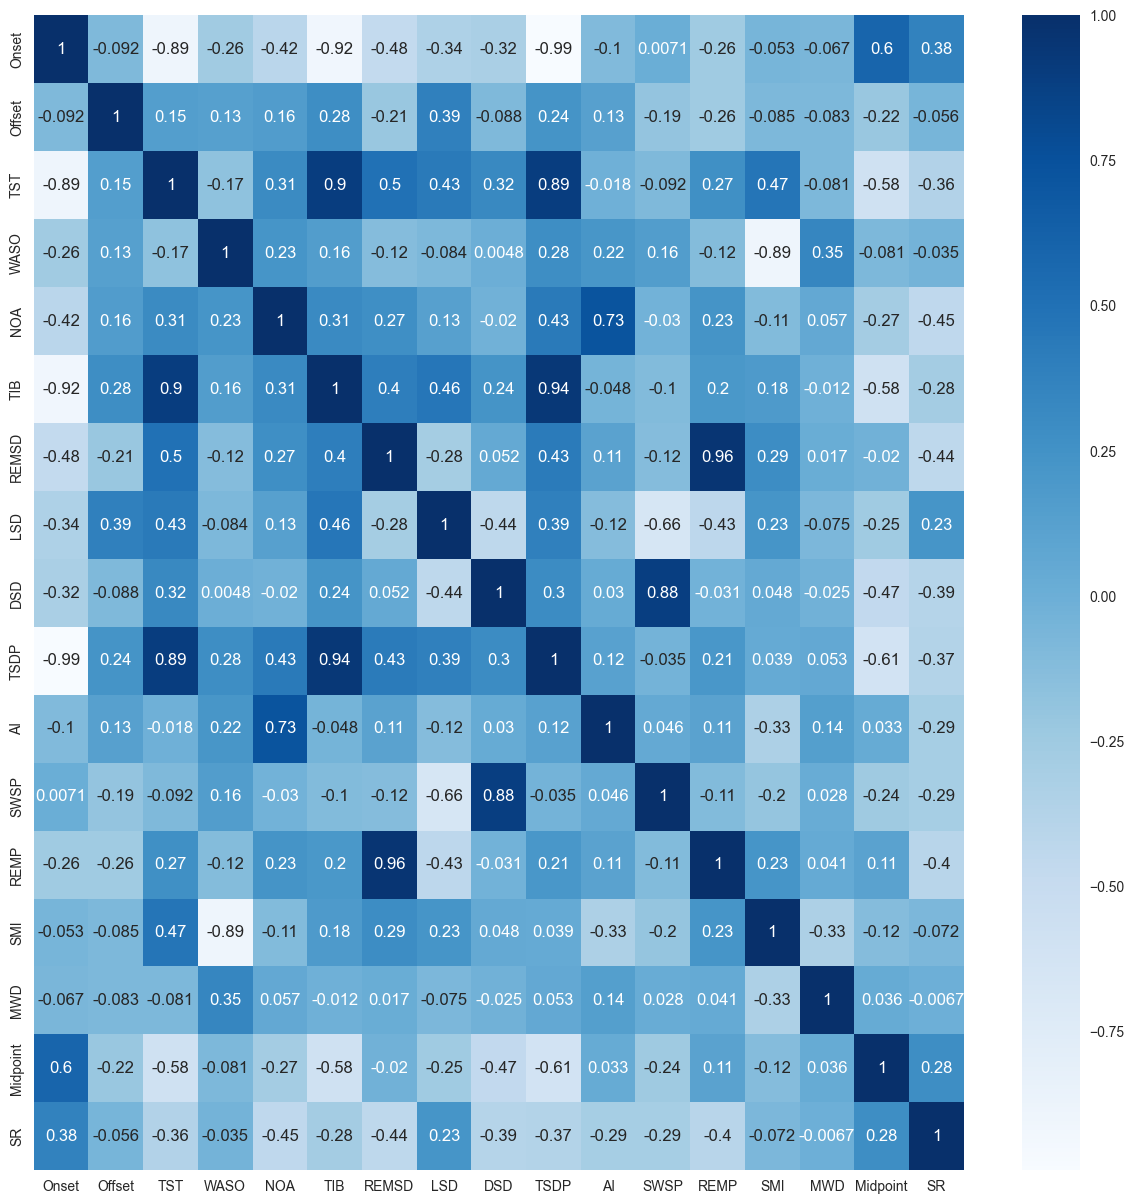

In [55]:
ax, fig = plt.subplots(figsize=(15, 15))
sns.heatmap(df_diff.corr(), annot=True, cmap="Blues")

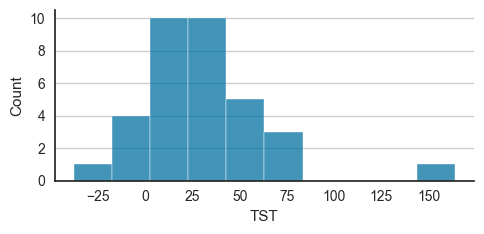

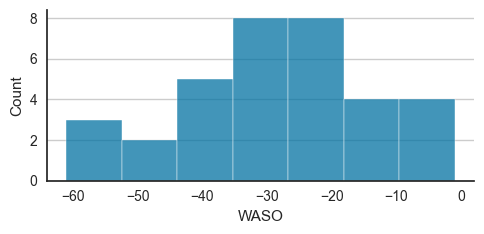

In [56]:
for x in ['TST', 'WASO']:
    sns.displot(data=df_diff, x=x, height=2.5, aspect=2)
    plt.savefig(f'../visuals/analysis/diff_{x}.png')

## End